In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import data_array as data_array
import disfa as disfa
import numpy as np
from scipy import ndimage
import scipy

In [2]:
# use the first subject as example. all availabe subjects are stored in disfa.disfa_id_subj_all
id_sub = 21
# load all AU targets from subject 1
targets = disfa.disfa['AUall'][id_sub][:]

[FileHDF5] read file /home/luka/Documents/DISFA/Labels/AUall/SN021_labels_AUall.mat


In [3]:
# targets contain 4845 frames and 12 AUs
# see http://www.engr.du.edu/mmahoor/DISFAContent.htm for the description of the AUs, the order is ascending
targets.shape

(4845, 12)

In [4]:
#load all images from subject 1
images = disfa.disfa['images'][id_sub][:]

[FileHDF5] read file /home/luka/Documents/DISFA/Features/images/SN021_features_images.mat


In [5]:
# images contain 4845 frames with images of size 128 x 118 (x and y axis are swapped)
images.shape

(4845, 118, 128)

(118, 128)
(768, 1024, 3)
(118, 128)
gray
['gray', 'gray', 'gray', 'gray']
save to /home/luka/Dropbox/msc_icl/541_Individual_Project/report_final/figures/seb_preproc.pdf


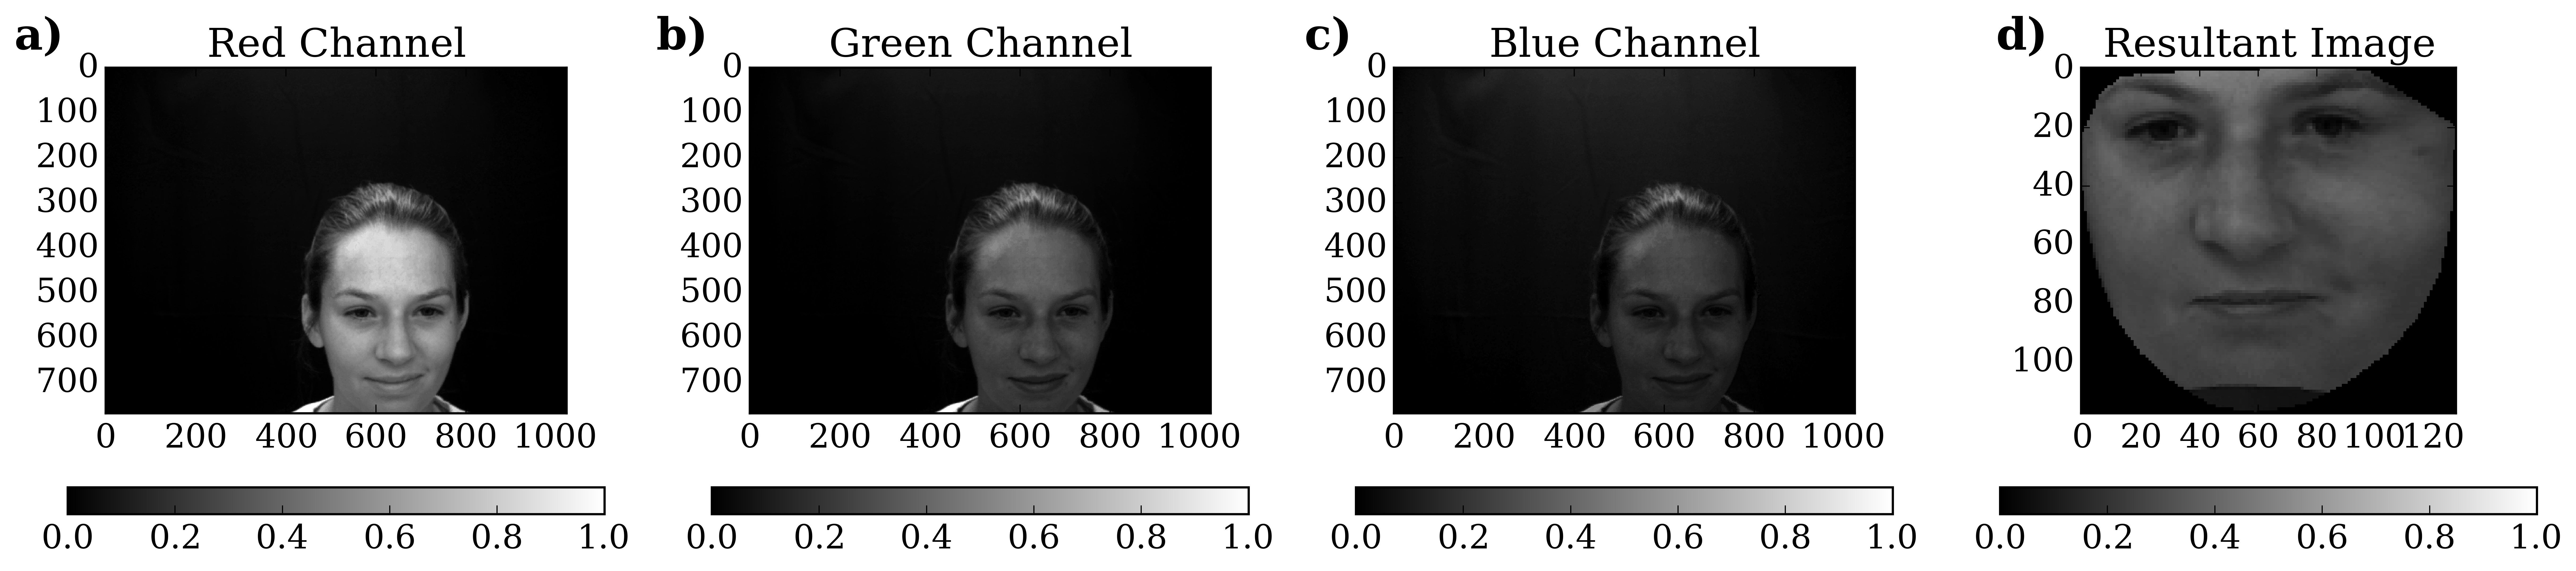

In [10]:
def show(images,i):
    # print 21119-19380
    plt.figure()
    scale = 1.0
    image = images[i,:,:]
#     image = scipy.misc.imresize(image,[int(image.shape[1]*scale),int(image.shape[1]*scale)])
    # print the AU annotations and plot the image of the first sample
#     print('annotated AUs are {}'.format(targets[i,:]))
#     x,y = image.shape
#     left_crop = 0.0
#     right_crop = 0.0
#     top_crop = 0.0
#     bottom_crop = 0.0
#     l = int(0 + x*left_crop)
#     r = int(x - x*right_crop)

#     u = int(0 + y*top_crop)
#     d = int(y - y*bottom_crop)
#     image = image[u:d,l:r]
#     plt.imshow(image, cmap='gray')
#     plt.colorbar()
    print image.shape
#     plt.savefig('/home/luka/Desktop/1.png', bbox_inches='tight', pad_inches=0)
#     plt.show()
    return image/float(255)
show(images,400)

import sys,os
sys.path.append('../../src')
from helper import plot_images

import matplotlib.image as mpimg
img=mpimg.imread('/home/luka/Dropbox/1.png')
print img.shape
save = os.path.join(os.path.expanduser('~'),'Dropbox/msc_icl/541_Individual_Project/report_final/figures/')
save += 'seb_preproc.pdf'
names = ['Red Channel', 'Green Channel', 'Blue Channel', 'Resultant Image']
plot_images([img[:,:,0],img[:,:,1],img[:,:,2],show(images,400)],names=names,save=save,range=(0,1)
            ,cmap='gray')


In [7]:
# as convenience function to load data from all subjects, use:
targets_all, id_array = data_array.IndicesCollection(disfa.disfa_ic_all).getitem(disfa.disfa['AUall'])

[FileHDF5] read file /home/luka/Documents/DISFA/Labels/AUall/SN001_labels_AUall.mat
[FileHDF5] read file /home/luka/Documents/DISFA/Labels/AUall/SN002_labels_AUall.mat
[FileHDF5] read file /home/luka/Documents/DISFA/Labels/AUall/SN003_labels_AUall.mat
[FileHDF5] read file /home/luka/Documents/DISFA/Labels/AUall/SN004_labels_AUall.mat
[FileHDF5] read file /home/luka/Documents/DISFA/Labels/AUall/SN005_labels_AUall.mat
[FileHDF5] read file /home/luka/Documents/DISFA/Labels/AUall/SN006_labels_AUall.mat
[FileHDF5] read file /home/luka/Documents/DISFA/Labels/AUall/SN007_labels_AUall.mat
[FileHDF5] read file /home/luka/Documents/DISFA/Labels/AUall/SN008_labels_AUall.mat
[FileHDF5] read file /home/luka/Documents/DISFA/Labels/AUall/SN009_labels_AUall.mat
[FileHDF5] read file /home/luka/Documents/DISFA/Labels/AUall/SN010_labels_AUall.mat
[FileHDF5] read file /home/luka/Documents/DISFA/Labels/AUall/SN011_labels_AUall.mat
[FileHDF5] read file /home/luka/Documents/DISFA/Labels/AUall/SN012_labels_AU

In [8]:
# id_array contains the subjects and frame number of each sample:
id_array[0,:]
#this means the first sample is from subject 1 frame 0

array([1, 0])

In [9]:
makingCrazyGif = False
if makingCrazyGif:
    from PIL import Image, ImageSequence
    import sys, os
    frames = [Image.fromarray((1-np.uint8(images[i]))*255) for i in range(1700,1900)]


    from images2gif import writeGif
    writeGif(os.path.basename('fuck.gif'), frames, duration=1.0/1000.0, dither=0)